### Group Name: Backpropagators
### Machine Learning & Deep Learng - AIGC-5002-0NC
### Assignment 2 (ML Problem Solving)
### Members:
    1. Clinoy Cleetus - n01720187
    2. Daivik Patel - n01663615
    3. Priyam Desai - n01623725
    4. Utsav Bhanderi - n01728417
    5. Yash Mehrotra - n01731693

### Problem Defination and Analysis

    - Aims to predict whether a customer will accept a personal loan based on their financial and demographic attributes.
    - Identifying key features like income, age, and credit usage for loan acceptance and to build an effective classification model.

    - This can be helpful for bank sectors for better marketing, they can target people who have high probablity of loan acceptance. Also, bank can understand customer behavior and take some descision from it.

    - Machine learning is an ideal solution because we have data set which is large enough to find exisiting pattern and with the given feature we will be easily able to classify by using various ML Classification algorithm as we want to classify wether person will take a loan or not (yes or no)

In [17]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

### Gathering and understanding the dataset
[Source : Bank Loan Modelling Dataset](https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling/data)


---
### Column Descriptions

| **Column Name**       | **Description**                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| **ID**                | Customer ID                                                                    |
| **Age**               | Customer's age in completed years                                              |
| **Experience**        | Number of years of professional experience                                     |
| **Income**            | Annual income of the customer                                                  |
| **ZIPCode**           | Home address ZIP code                                                          |
| **Family**            | Family size of the customer                                                    |
| **CCAvg**             | Average spending on credit cards per month                                     |
| **Education**         | Education Level: 1 = Undergrad; 2 = Graduate; 3 = Advanced/Professional        |
| **Mortgage**          | Value of house mortgage, if any (in $000)                                      |
| **Personal Loan**     | Did this customer accept the personal loan offered in the last campaign? (1 = Yes, 0 = No) |
| **Securities Account**| Does the customer have a securities account with the bank? (1 = Yes, 0 = No)   |
| **CD Account**        | Does the customer have a certificate of deposit (CD) account with the bank? (1 = Yes, 0 = No) |
| **Online**            | Does the customer use internet banking facilities? (1 = Yes, 0 = No)           |
| **CreditCard**        | Does the customer use a credit card issued by UniversalBank? (1 = Yes, 0 = No) |
---

In [21]:

filename = 'Bank_Personal_Loan.csv'
df = pd.read_csv(filename)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [25]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### Data Preprocessing / Cleaning

In [30]:
#id is not relevant, dropping
df.drop("ID", axis=1, inplace=True)

In [32]:
#checking null values
df.isna().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [34]:
#checking duplicate rows
df.duplicated().sum()

0

### At this point, we know that there are no null values and no duplicated rows in the data set.

### Exploratory Data Analysis

In [40]:
df.shape

(5000, 13)

<Figure size 640x480 with 0 Axes>

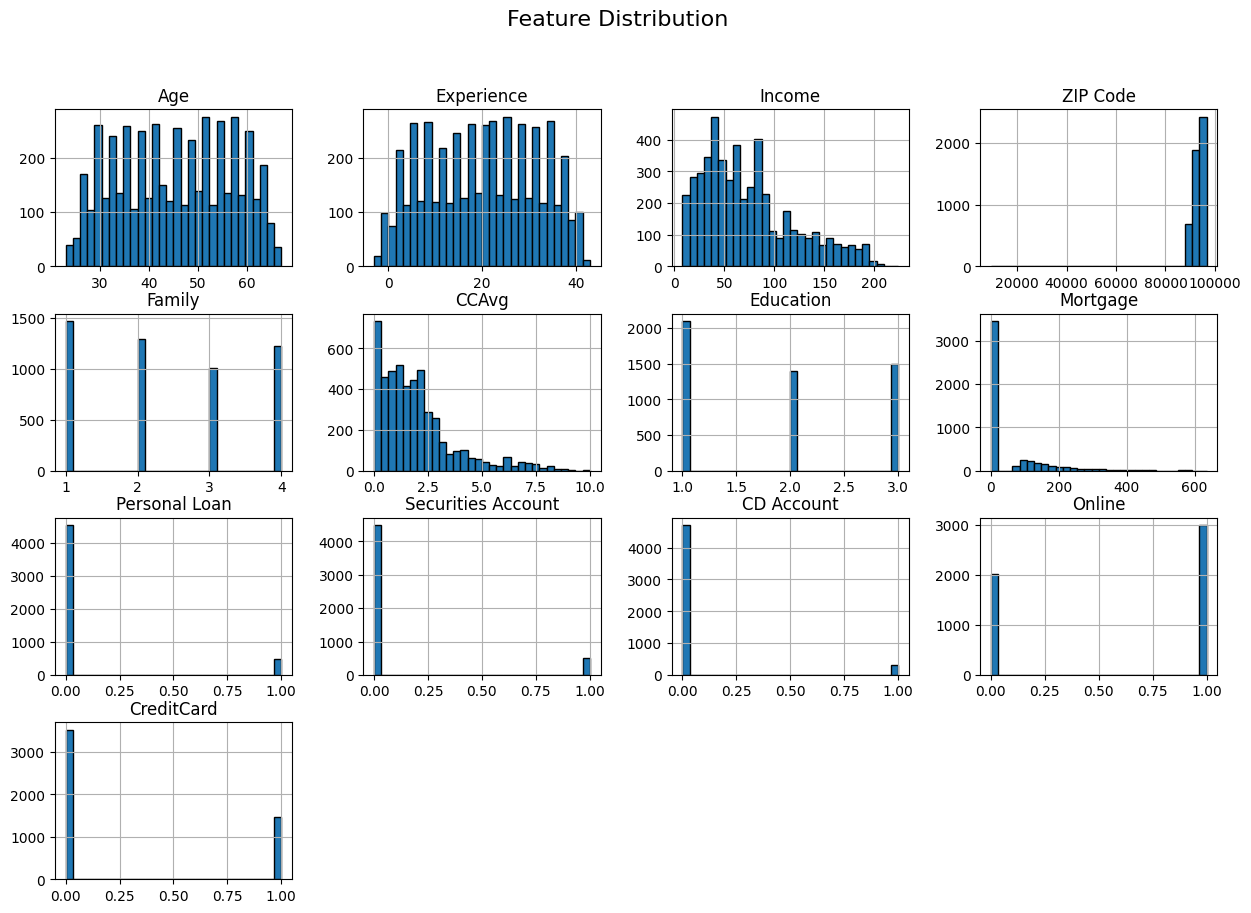

In [42]:
#feature distribution
plt.figure()
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distribution", fontsize=16)
plt.show()

### Age and Experience are evenly distributed.

### Personal Loan, Securities Account, CD Account, and CreditCard are imbalanced.

### Income, CCAvg are positively skewed.

### Correlation heatmap to find out linearlity between two independent variable

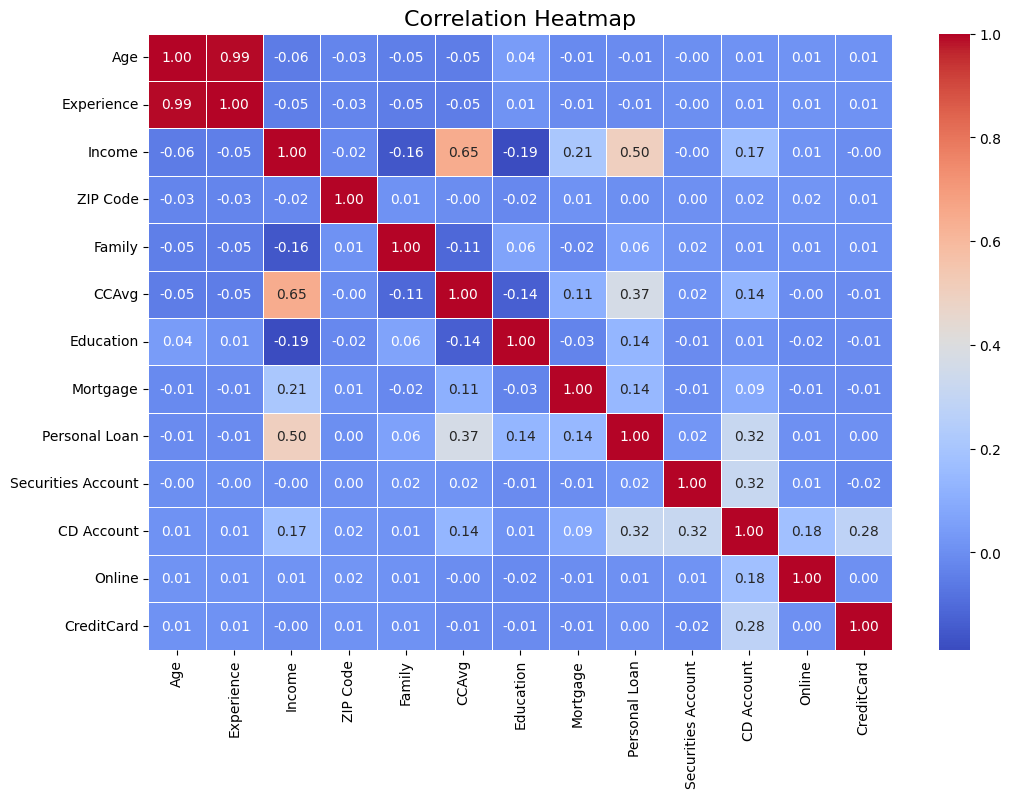

In [48]:
#correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [51]:
#encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [53]:
#scaling
scaler = StandardScaler()
x = df_encoded.drop('Personal Loan', axis=1)
y = df_encoded['Personal Loan']

---

### Model Selection

    - Classification Problem: Since we need to predict if a customer will accept a personal loan (yes or no), this is a classification problem, so we will use classifier models.
    
    - 1.Logistic Regression
    
    - 2.Random Forest Classifier

---

In [61]:
#scaling features using standard scaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Data Splitting

In [65]:
#splitting training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

### Model Building and Training

### Logistic Regression

In [70]:
#setting up logistic regression model
lg_model = LogisticRegression(max_iter=1000)
lg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
#logistic regression prediction
y_pred_lg = lg_model.predict(x_test)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

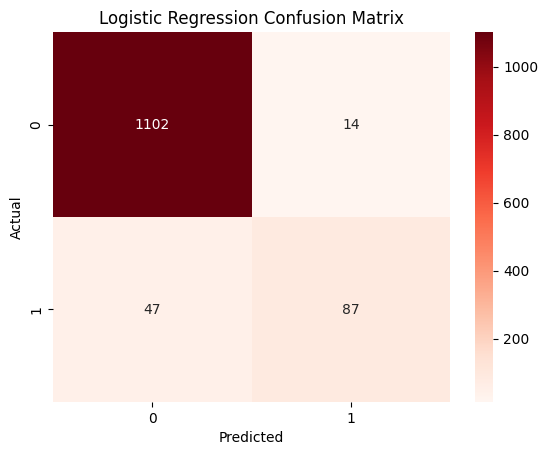

In [74]:
#logistic regression confusion matrix
lg_con_mat = confusion_matrix(y_test, y_pred_lg)
sns.heatmap(lg_con_mat, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression Confusion Matrix")

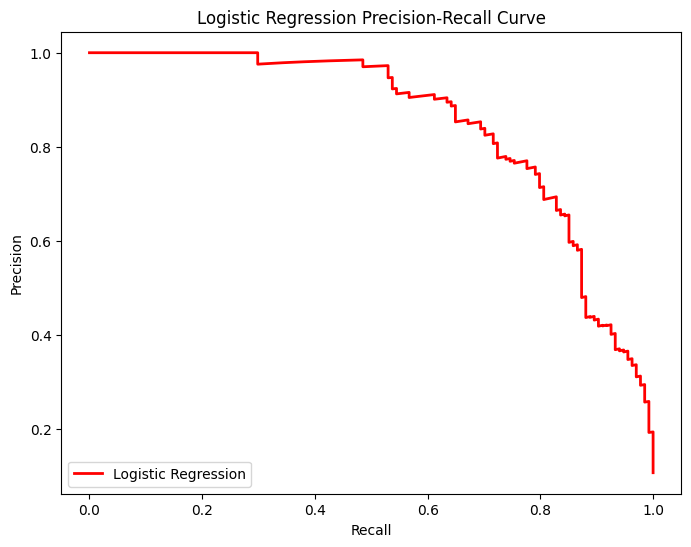

In [76]:
#logistic regression precision-recall curve
precision_lg, recall_lg, _ = precision_recall_curve(y_test, lg_model.predict_proba(x_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_lg, precision_lg, color='red', lw=2, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [78]:
#logistic regression evaluation
accuracy_lg = accuracy_score(y_test, y_pred_lg)
print(f"Logistic Regression Accuracy: {accuracy_lg:.4f}")

report = classification_report(y_test, y_pred_lg)
print("Classification Report:")
print(report)

Logistic Regression Accuracy: 0.9512
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1116
           1       0.86      0.65      0.74       134

    accuracy                           0.95      1250
   macro avg       0.91      0.82      0.86      1250
weighted avg       0.95      0.95      0.95      1250



### Random Forest Classifier

In [82]:
#setting up random forest classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
#random forest classifier prediction
y_pred_rf = rf_model.predict(x_test)

### Model Testing and Evaluation

Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

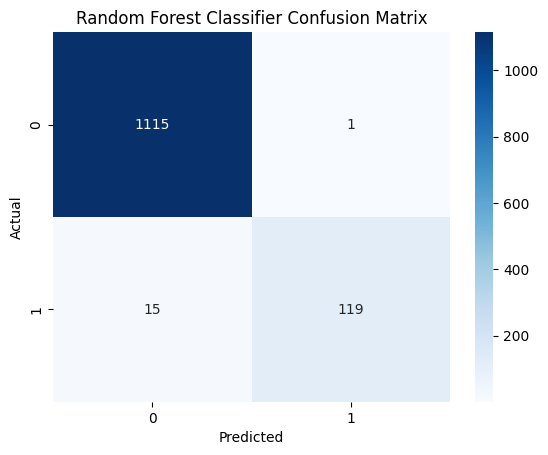

In [87]:
#function for evaluation of 
rf_con_mat = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classifier Confusion Matrix")

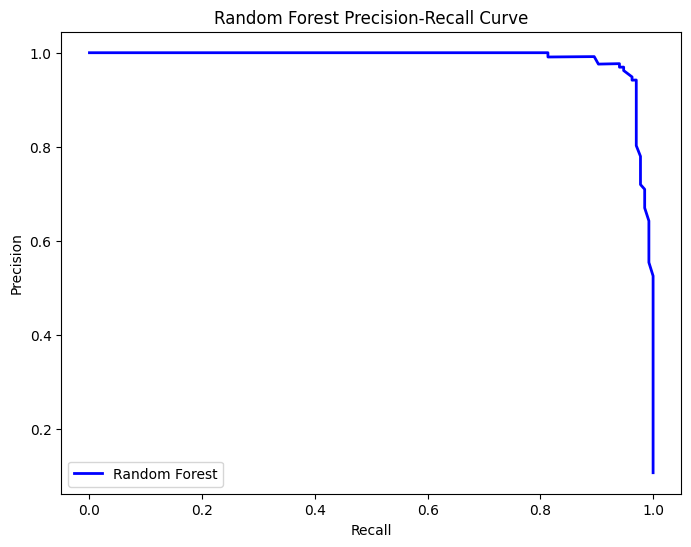

In [89]:
#random forest classifier precision-recall curve
precision_rf, recall_rf, _ = precision_recall_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [91]:
#random forest classifier evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")

report = classification_report(y_test, y_pred_rf)
print("Classification Report:")
print(report)

Random Forest Classifier Accuracy: 0.9872
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1116
           1       0.99      0.89      0.94       134

    accuracy                           0.99      1250
   macro avg       0.99      0.94      0.96      1250
weighted avg       0.99      0.99      0.99      1250



<h1> Accuracy of Random Forest Classifier is higher than Logistic Regression